In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd
import cufflinks as cf
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

cf.go_offline()
DATA_DIR = Path('../data/processed')
MODEL_DIR = Path('../models')

data = gpd.GeoDataFrame.from_file(DATA_DIR / 'spatial_income_1880.gpkg')

In [2]:
SEED = 42
N_CLUSTERS = 12
cluster_colors = plt.get_cmap('tab20')

xy = np.array([data.geometry.x, data.geometry.y]).T
groups = KMeans(n_clusters=N_CLUSTERS, random_state=SEED).fit_predict(xy)
data['group'] = groups

<AxesSubplot: >

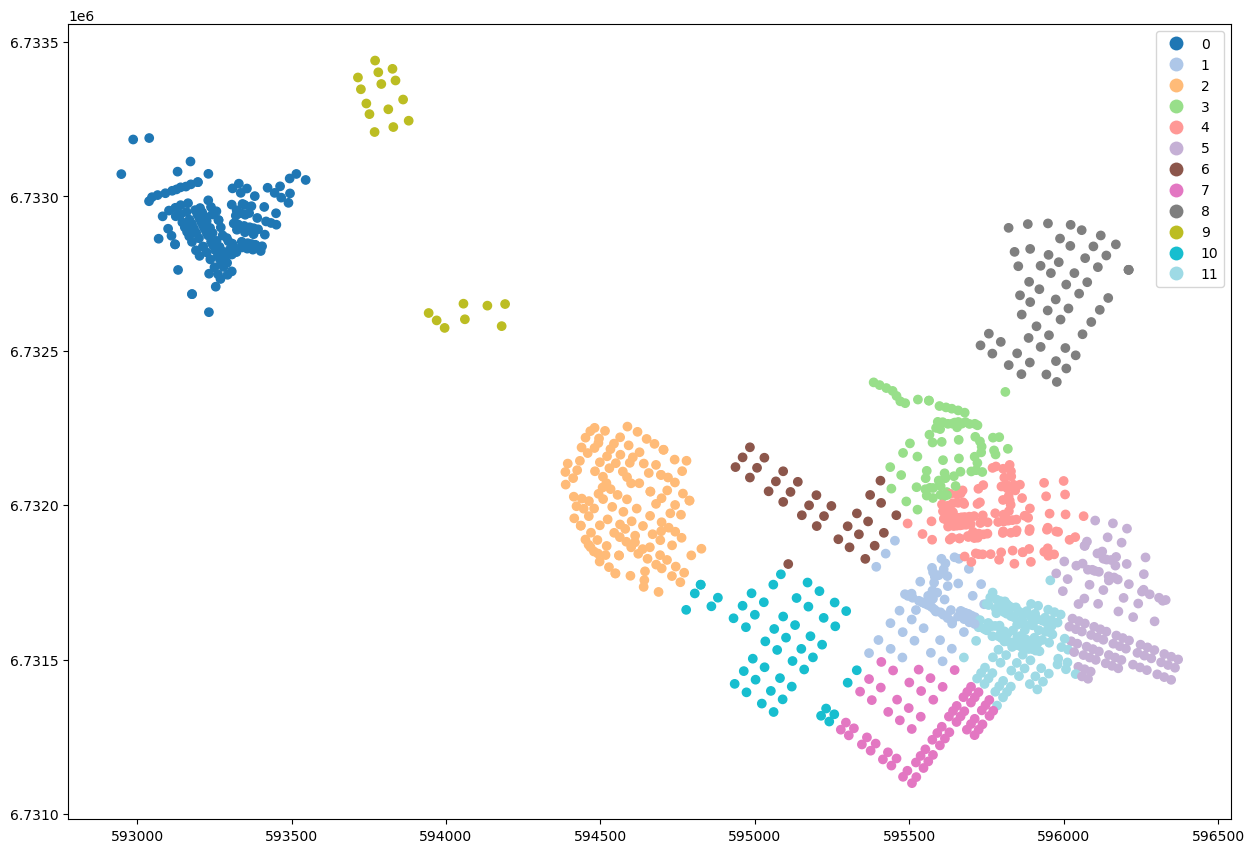

In [3]:
data.plot(
    column='group',
    categorical=True,
    cmap=cluster_colors,
    figsize=(15, 15),
    legend=True,
)